# Feature Learning of Minute-Market-Data
### Dan Schmidt's Script Fall 2016

In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)
%aimport preprocess
from preprocess.process import get_symbol
from preprocess.process import get_symbols_matrix
from preprocess.process import df_to_returns
from preprocess.process import get_windows_rets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
from IPython.core.debugger import Tracer
import scipy as sp
from scipy.linalg import svd
from sklearn.decomposition import PCA
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Preprocessing
Read the data in, convert dates to a useful format

In [2]:
# Use tickers in the Dow Jones for most of this analysis
data_loc = "/home/dan/code/market_data/"
symbols = [line.rstrip('\n') for line in open(data_loc+'dow_jones_industrial.txt')]

train_start_date = "03/01/2015"
train_end_date = "03/14/2015"

test_start_date = "03/15/2015"
test_end_date = "03/21/2015"

test_symbols = symbols

sym_mat, real_syms = get_symbols_matrix(symbols, data_loc, train_start_date, train_end_date)

Reading AAPL from pickle
Reading AXP from pickle
Reading BA from pickle
Reading CAT from pickle
Reading CSCO from pickle
Reading CVX from pickle
Reading DD from pickle
Reading DIS from pickle
Reading GE from pickle
Reading GS from pickle
Reading HD from pickle
Reading IBM from pickle
Reading INTC from pickle
Reading JNJ from pickle
Reading JPM from pickle
Reading KO from pickle
Reading MCD from pickle
Reading MMM from pickle
Reading MRK from pickle
Reading MSFT from pickle
Reading NKE from pickle
Reading PFE from pickle
Reading PG from pickle
Reading TRV from pickle
Reading UNH from pickle
Reading UTX from pickle
Reading V from pickle
Reading VZ from pickle
Reading WMT from pickle
Reading XOM from pickle


## Market Basket Analysis: Finding Eigenportfolios

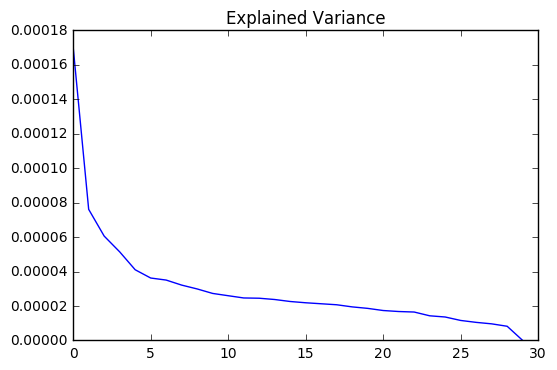

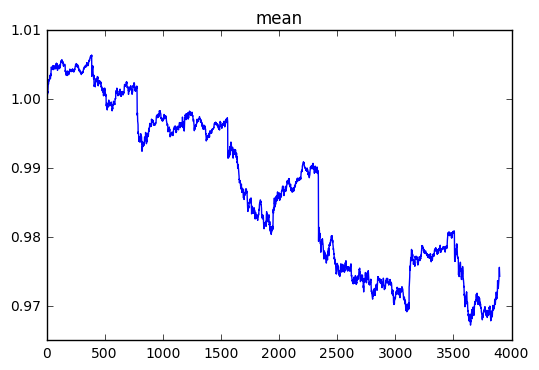

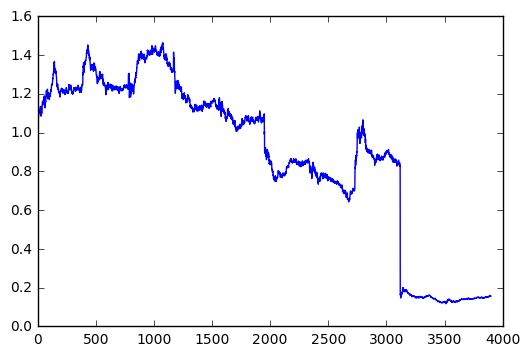

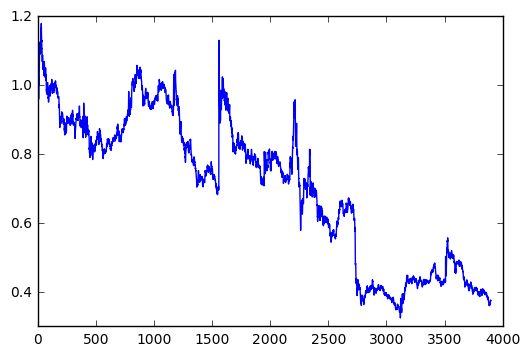

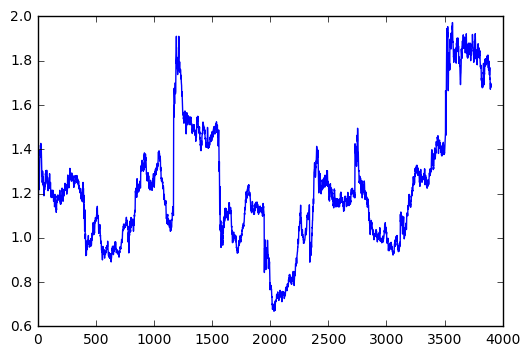

In [3]:

# Transpose the matrix so rows are symbols and columns are prices
X = sym_mat.T

# Fit a standard PCA model using a randomized SVD method for efficiency
pca = PCA(svd_solver="randomized")
pca.fit(X)

# Show the decay in the eigenvalues
plt.plot(pca.explained_variance_)
plt.title("Explained Variance")
plt.show()

# Plot what the mean looks like over time, and compare to the DJI
plt.plot((1+pca.mean_).cumprod())
plt.title('mean')
plt.show()

for i in range(3):
    plt.plot((1+pca.components_[i]).cumprod())
    plt.show()

## Dimension Reduction on Hour Windows

In [ ]:
# PCA


# Kernel PCA

